In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [99]:
df=pd.read_csv('https://raw.githubusercontent.com/sjwhitworth/golearn/master/examples/datasets/tennis.csv')
#print(df.head())
df.reset_index()
encoder = preprocessing.LabelEncoder()
#df['outlook']=encoder.fit_transform(df['outlook'])
X=pd.get_dummies(df['outlook'])
df['temp_enc']=encoder.fit_transform(df['temp'])
df['target']=encoder.fit_transform(df['play'])
df['windy_enc']=encoder.fit_transform(df['windy'])
df['humidity_enc']=encoder.fit_transform(df['humidity'])
X=pd.concat([X,df['temp_enc']],axis=1)
X=pd.concat([X,df['windy_enc']],axis=1)
X=pd.concat([X,df['humidity_enc']],axis=1)
print(X)
y=np.array(df['target'])

#print(df)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

    overcast  rainy  sunny  temp_enc  windy_enc  humidity_enc
0          0      0      1         1          0             0
1          0      0      1         1          1             0
2          1      0      0         1          0             0
3          0      1      0         2          0             0
4          0      1      0         0          0             1
5          0      1      0         0          1             1
6          1      0      0         0          1             1
7          0      0      1         2          0             0
8          0      0      1         0          0             1
9          0      1      0         2          0             1
10         0      0      1         2          1             1
11         1      0      0         2          1             0
12         1      0      0         1          0             1
13         0      1      0         2          1             0


Text(0.5, 257.44, 'Predicted label')

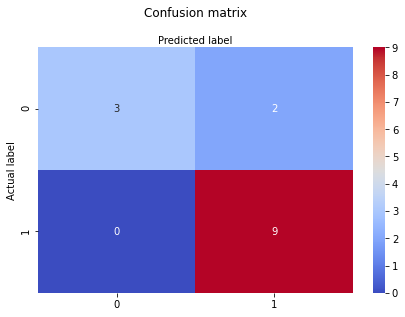

In [106]:
#https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
pipeline= Pipeline([
   ('scaler',StandardScaler()),
    ('pca', PCA()),
   ('clf',RandomForestClassifier(n_estimators=5,max_depth=1,min_samples_leaf=3, max_features=6, random_state=42))
])
pipeline.fit(X_train,y_train)

#Predicting y for X_val
y_pred = pipeline.predict(X)
cm = confusion_matrix(y,y_pred)

class_names=[1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


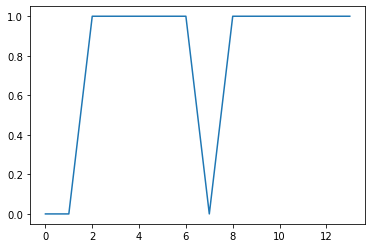

In [107]:
plt.plot(y_pred)

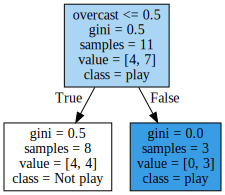

In [110]:
dt= DecisionTreeClassifier(max_depth=1,min_samples_leaf=3, max_features=6, random_state=42)
dt.fit(X_train, y_train)


chosen_tree=pipeline['clf'].estimators_[4]

cols=X_train.columns

exported=tree.export_graphviz(
    decision_tree=dt,
    out_file=None,
    feature_names=cols,
    precision=1,
    class_names=['Not play','play'],
    filled=True)

graph=graphviz.Source(exported)
display(graph)

In [111]:
print ("Look for the best parameters in the random forest classifier")

parameter_grid={'n_estimators':[1,2,3,4,5],'max_depth':[2,4,6,8,10],'min_samples_leaf':[1,2,4],'max_features':[1,2,3,4,5,6,7,8]}


number_models=4
random_RandomForest_class=RandomizedSearchCV(
    estimator=pipeline['clf'],
    param_distributions=parameter_grid,
    n_iter=number_models,
    scoring='accuracy',
    n_jobs=2,
    cv=4,
    refit=True,
    return_train_score=True)

random_RandomForest_class.fit(X_train,y_train)
predictions=random_RandomForest_class.predict(X)

print("Accuracy Score",accuracy_score(y,predictions));
print("Best params",random_RandomForest_class.best_params_)
print("Best score",random_RandomForest_class.best_score_)

Look for the best parameters in the random forest classifier
Accuracy Score 0.6428571428571429
Best params {'n_estimators': 2, 'min_samples_leaf': 4, 'max_features': 2, 'max_depth': 4}
Best score 0.625


Principle component analysis show the importance of each feature


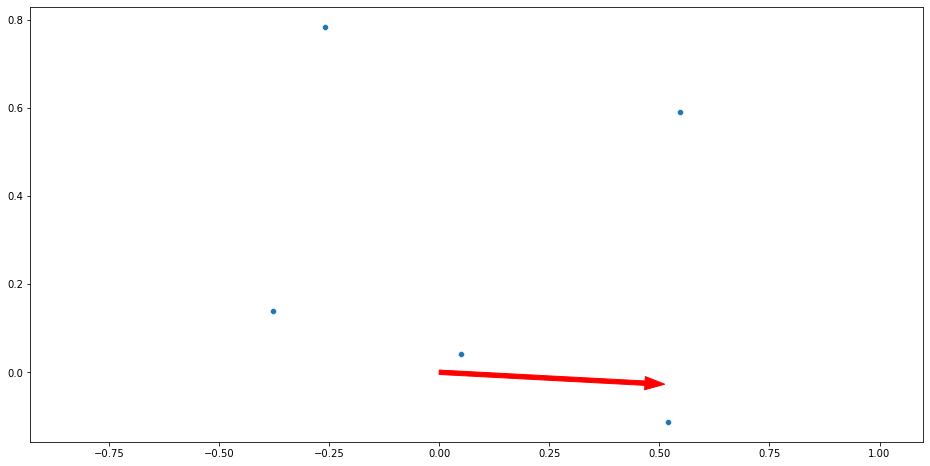

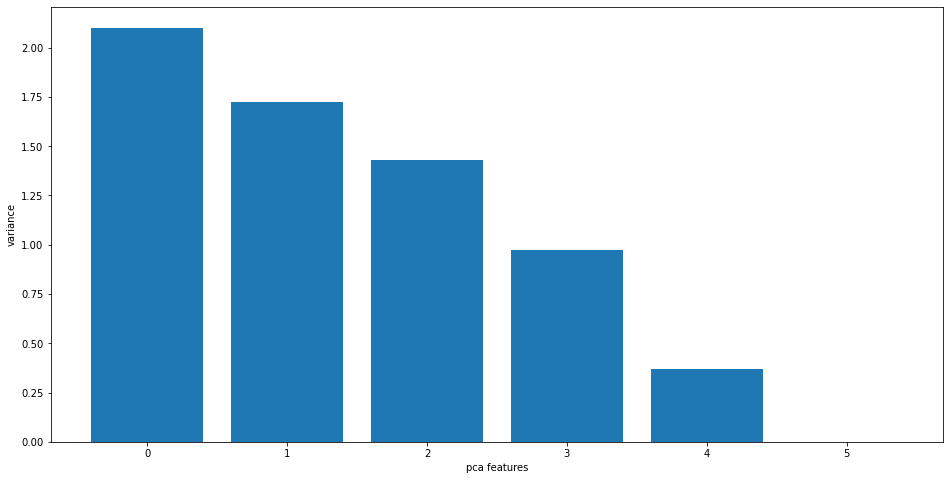

In [112]:
print('Principle component analysis show the importance of each feature')
pca=pipeline['pca']
pca_features=pca.components_
xs = pca_features[:,0]

fig,ax = plt.subplots(figsize=(16,8))
# Assign 1st column of pca_features: ys
ys = pca_features[:,1]
# Scatter plot xs vs ys
sns.scatterplot(x=xs, y=ys)

mean = pca.mean_
first_pc = pca.components_[0,:]
# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0],mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

plt.axis('equal')
plt.show()

fig,ax = plt.subplots(figsize=(16,8))
features = range(pca.n_components_)
ax.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('pca features')
plt.show()